# Sprint19課題 データセット作成

In [65]:
import numpy as np
import glob 
#regular expression
import re
import cv2

from PIL import Image

In [66]:
dog_str = "./01_dog"
cat_str = "./02_cat"
dog_imgs = glob.glob(dog_str + '/*' + '.jpeg')
cat_imgs = glob.glob(cat_str + '/*' + '.jpeg')

In [67]:
dog_imgs

['./01_dog/dog_00009.jpeg',
 './01_dog/dog_00005.jpeg',
 './01_dog/dog_00004.jpeg',
 './01_dog/dog_00008.jpeg',
 './01_dog/dog_00003.jpeg',
 './01_dog/dog_00002.jpeg',
 './01_dog/dog_00001.jpeg',
 './01_dog/dog_00007.jpeg',
 './01_dog/dog_00006.jpeg',
 './01_dog/dog_00010.jpeg']

In [68]:
cat_imgs

['./02_cat/cat_00006.jpeg',
 './02_cat/cat_00010.jpeg',
 './02_cat/cat_00007.jpeg',
 './02_cat/cat_00001.jpeg',
 './02_cat/cat_00002.jpeg',
 './02_cat/cat_00003.jpeg',
 './02_cat/cat_00008.jpeg',
 './02_cat/cat_00004.jpeg',
 './02_cat/cat_00005.jpeg',
 './02_cat/cat_00009.jpeg']

In [69]:
np.array([[1, 0]]).shape

(1, 2)

In [70]:
def resize_img_to_get_array(img_list, n_targets=2, height = 224, width = 224, channel = 3):
        img_array = np.empty((0, height, width, channel))
        target_array = np.empty((0, n_targets))
        for img in img_list:
                if re.search('.jpeg', img):
                        img_tensor = Image.open(img)
                        img_tensor = np.asarray(img_tensor)
                        img_tensor = cv2.resize(img_tensor, dsize=(height, width))
                        img_tensor = img_tensor.reshape(1, height, width, channel)
                        img_array = np.append(img_array, img_tensor, axis=0)
                        if re.search('dog', img):
                                target_array = np.append(target_array, np.array([[1, 0]]), axis=0)
                        elif (re.search('cat', img)):
                                target_array = np.append(target_array, np.array([[0, 1]]), axis=0)
        return img_array  / 255.0, target_array
                
        

In [71]:
dog_img_array, dog_target_array = resize_img_to_get_array(dog_imgs)
cat_img_array, cat_target_array = resize_img_to_get_array(cat_imgs)

In [72]:
print(dog_img_array.shape)
print(cat_img_array.shape)

(10, 224, 224, 3)
(10, 224, 224, 3)


In [73]:
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
print(img_array.shape)

(20, 224, 224, 3)


In [74]:
target_array = np.append(dog_target_array, cat_target_array, axis=0)
target_array

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

20


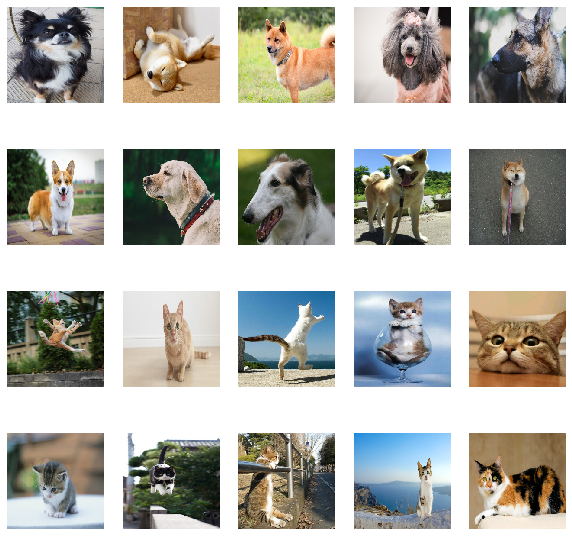

In [75]:
import matplotlib.pyplot as plt
print(img_array.shape[0])
plt.figure(figsize=(10, 10))
for i in range(img_array.shape[0]):
        plt.subplot(4, 5, i+1)
        plt.imshow(img_array[i])
        plt.axis('off')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(img_array, target_array, test_size=0.2)

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as K

def gen_model():
        model = Sequential([
                Conv2D(50, (3, 3)),
                Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Conv2D(50, (3, 3)),
                Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Conv2D(50, (3, 3)),
                Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Flatten(),
                Dense(2),
                Activation('softmax')
        ])

        params = {
                'optimizer': 'Adam',
                'loss':'categorical_crossentropy',
                'metrics':['accuracy']
        }
        model.compile(**params)
        return model 


Using TensorFlow backend.


In [ ]:
K.clear_session()
model = gen_model()
model.fit(
        x=X_train, y=y_train,
        batch_size=1, epochs=10,
        validation_data=(X_val, y_val)
)

In [454]:
pred =model.predict(X_val)
pred = np.argmax(pred, axis=1)
y_actual = np.argmax(y_val, axis=1)
print(pred)
print(y_actual)
print(pred == y_actual)
print("acuracy: ", (pred == y_actual).sum()/len(pred))

[0 1 1 1]
[0 0 0 1]
[ True False False  True]
acuracy:  0.5


## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。
データ拡張のためのライブラリにはalbumentationsなどがあります。

また、Kerasを使う場合はImageDataGeneratorも便利です。<br>
[使い方](http://pynote.hatenablog.com/entry/keras-image-data-generator)

データ拡張の効果の調査
データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

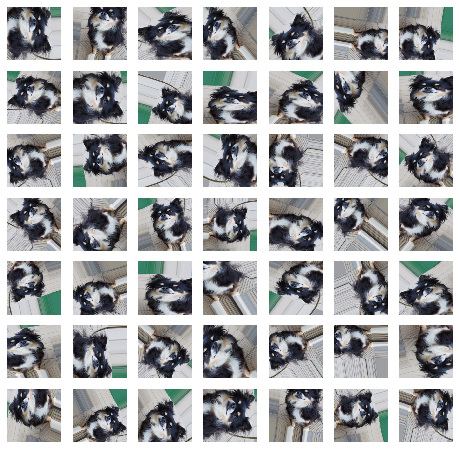

In [473]:
from keras.preprocessing import image

#get instance of image generator 
params = {
        'rotation_range': 180,#回転
        'vertical_flip': True,#x方向を軸として回転
        'horizontal_flip': True,# y方向を軸として回転
        'width_shift_range': 0.3,#x方向に平行移動
        'height_shift_range': 0.3,#y方向に平行移動
        'shear_range': 5,#せん断（平行四辺形への写像）
        'zoom_range': 0.3#拡大縮小の率 ( 0.7 ~ 1.3まで)
}
datagen = image.ImageDataGenerator(**params)

#python generator to get mini_batch
#(H, W, C) -> (1, H, W, C)
x = img_array[0][np.newaxis]
gen = datagen.flow(x, batch_size=1)

#generate 9 images with python generator
patterns = len(params)
fig, axes = plt.subplots(patterns, patterns, figsize=(8, 8))
for i in range(patterns):
        for j in range(patterns):
                batches = next(gen)
                gen_img = batches[0]
                axes[i, j].imshow(gen_img)
                axes[i, j].axis('off')


In [474]:
#20枚のデータでやってみる
from keras.preprocessing import image
def amplify_img_data(imgs, target):
        params = {
                'rotation_range': 180,#回転
                'vertical_flip': True,#x方向を軸として回転
                'horizontal_flip': True,# y方向を軸として回転
                'width_shift_range': 0.3,#x方向に平行移動
                'height_shift_range': 0.3,#y方向に平行移動
                'shear_range': 5,#せん断（平行四辺形への写像）
                'zoom_range': 0.3#拡大縮小の率 ( 0.7 ~ 1.3まで)
        }
        datagen = image.ImageDataGenerator(**params)
        gen_img_array = np.empty((0, *imgs[0].shape))
        gen_target_array = np.empty((0, *target[0].shape))

        for i, img in enumerate(imgs):
                gen = datagen.flow(img[np.newaxis], batch_size=1)
                print(i)
                #generate images with python generator
                patterns = len(params)
                for _ in range(patterns):
                        for __ in range(patterns):
                                batches = next(gen)
                                gen_img = batches[0][np.newaxis]

                                gen_img_array = np.append(gen_img_array, gen_img, axis=0)
                                gen_target_array = np.append(gen_target_array, target[i][np.newaxis], axis=0)
        return gen_img_array, gen_target_array

In [475]:
amplified_img, amplified_target = amplify_img_data(imgs=img_array, target=target_array)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [485]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(amplified_img, amplified_target, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [486]:
K.clear_session()
model = gen_model()
model.fit(
        x=X_train, y=y_train,
        batch_size=10, epochs=10,
        validation_data=(X_val, y_val)
)

Train on 627 samples, validate on 157 samples
Epoch 1/10
627/627 [==============================] - 87s 139ms/step - loss: 0.7180 - acc: 0.5231 - val_loss: 0.6904 - val_acc: 0.5159
Epoch 2/10
627/627 [==============================] - 104s 165ms/step - loss: 0.6412 - acc: 0.6093 - val_loss: 0.4989 - val_acc: 0.7261
Epoch 3/10
627/627 [==============================] - 100s 160ms/step - loss: 0.5073 - acc: 0.7480 - val_loss: 0.4439 - val_acc: 0.7070
Epoch 4/10
627/627 [==============================] - 99s 158ms/step - loss: 0.4093 - acc: 0.7974 - val_loss: 0.4228 - val_acc: 0.7771
Epoch 5/10
627/627 [==============================] - 101s 162ms/step - loss: 0.3813 - acc: 0.7847 - val_loss: 0.4968 - val_acc: 0.7325
Epoch 6/10
627/627 [==============================] - 101s 161ms/step - loss: 0.4174 - acc: 0.7895 - val_loss: 0.7099 - val_acc: 0.6051
Epoch 7/10
627/627 [==============================] - 104s 166ms/step - loss: 0.4246 - acc: 0.7703 - val_loss: 0.4190 - val_acc: 0.7389
Epoc

In [487]:
pred =model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_actual = np.argmax(y_test, axis=1)
print(pred)
print(y_actual)
print(pred == y_actual)
print("acuracy: ", (pred == y_actual).sum()/len(pred))

[1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 1 0 0]
[0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 1]
[False False  True  True False  True  True  True  True  True  True  True
  True  True  True False  True False  True  True  True False  True False
  True False  True  True  True False  True False  True F

In [ ]:
fig, axes = plt.subplots(int(len(X_test)/2),int(len(X_test)/2), figsize=(8, 8))
for i in range(len(X_test)/2):
        for j in range(len(X_test)/2):
                gen_img = X_test[i*j]
                axes[i, j].imshow(gen_img)
                axes[i, j].title(pred[i*j], "/",  y_actual[i*j])
                axes[i, j].axis('off')

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

アノテーションのためのツール

アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [1]:
#アノテーション結果
!cat ../sprint19/03_dog_and_cat/5_24838_175993_up_7RC28AN2.xml

<annotation>
	<folder>03_dog_and_cat</folder>
	<filename>5_24838_175993_up_7RC28AN2.jpg</filename>
	<path>/Users/ohmori/diveintocode-ml/diveintocode-term2/sprint/sprint19/03_dog_and_cat/5_24838_175993_up_7RC28AN2.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>726</width>
		<height>544</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>dog</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>25</ymin>
			<xmax>205</xmax>
			<ymax>177</ymax>
		</bndbox>
	</object>
	<object>
		<name>dog</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>272</xmin>
			<ymin>14</ymin>
			<xmax>483</xmax>
			<ymax>181</ymax>
		</bndbox>
	</object>
	<object>
		<name>cat</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>505</xmin>
			<ymin>10</ymin>
			<xmax>661</

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

問題3ではPacalVOC形式でAnnotaionファイルを保存したが、YOLO形式で保管し直した物を使う。

In [3]:
from PIL import Image
import numpy as np
def load_image(img_path):
        return np.array(Image.open(img_path))

def load_annotations(annotation_file_path):
        "loads the bounding boxes from a file"
        with open(annotation_file_path) as file:
                lines = file.read().splitlines()
        annotations = []
        class_nums = []
        for line in lines:
                annotation = [float(x) for x in line.split(' ')]
                annotations.append(np.array(annotation[1:]))
                class_nums.append(int(annotation[0]))
        return class_nums, np.array(annotations)

def load_category(category_file_path):
        with open(category_file_path) as file:
                lines = file.read().splitlines()
        categories = {}
        for idx, line in enumerate(lines):
                categories[idx] = line
        return categories

#https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 0, 0)
def embed_bbox_to_img(img, class_nums, annotations, categories, thick=1):
        height, width = img.shape[:2]
        for class_num, annotation in zip(class_nums, annotations):
                x_cent, y_cent, box_width, box_height = annotation
                
                x0 = int((x_cent - box_width/2) * width)
                x1 = int((x_cent + box_width/2) * width)
                y0 = int((y_cent - box_height/2)   *  height)
                y1 = int((y_cent + box_height/2) * height)
                cv2.rectangle(img, (x0, y0), (x1, y1), BOX_COLOR, thickness=thick)
                cv2.putText(img, categories[class_num], (x1 - 20, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, TEXT_COLOR, lineType=cv2.LINE_AA)
        return img
    
def show_image(img):
        plt.figure(figsize=(15, 15))
        plt.imshow(img)

In [45]:
categories = load_category("../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/classes.txt")

In [119]:
import glob
import re
import cv2
import matplotlib.pyplot as plt

dir_path = "../sprint18/keras-yolo3-master/03_dog_and_cat_yolo"
files = glob.glob(dir_path + "/*", recursive=True)
imgs_path = [file for file in files if re.search('\.(jp[e]?g)|(png)$', file)]
images = []
for img_path in imgs_path:
        img = load_image(img_path)
        annot_path = re.sub('\.(jp[e]?g)|(png)$', '.txt', img_path)
        print("image:               ", img_path)
        print("annotaion_file: ",annot_path)
        class_nums, annotations  = load_annotations(annot_path)
        print(annotations)
        img = embed_bbox_to_img(img, class_nums, annotations, categories)
        images.append(img)

image:                ../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/img_keep_kv.jpeg
annotaion_file:  ../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/img_keep_kv.txt
[[0.335211 0.540201 0.332394 0.688442]
 [0.628169 0.589196 0.23662  0.590452]]
image:                ../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/5_24838_175993_up_7RC28AN2.jpg
annotaion_file:  ../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/5_24838_175993_up_7RC28AN2.txt
[[0.141873 0.185662 0.280992 0.279412]
 [0.519972 0.179228 0.290634 0.306985]
 [0.80303  0.171875 0.214876 0.306985]
 [0.22865  0.535846 0.198347 0.244485]
 [0.552342 0.529412 0.203857 0.272059]
 [0.820937 0.501838 0.168044 0.272059]
 [0.210744 0.852941 0.23416  0.279412]
 [0.43595  0.839154 0.12259  0.306985]
 [0.570937 0.846507 0.11708  0.292279]
 [0.889118 0.863051 0.213499 0.273897]]
image:                ../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/dog_test_img001.jpg
annotaion_file:  ../sprint18/keras-yolo3-master/03_dog_and_c

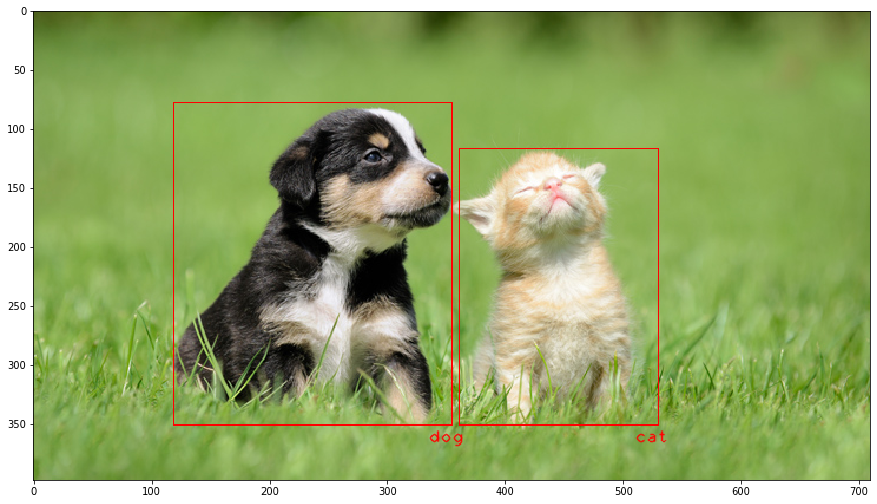

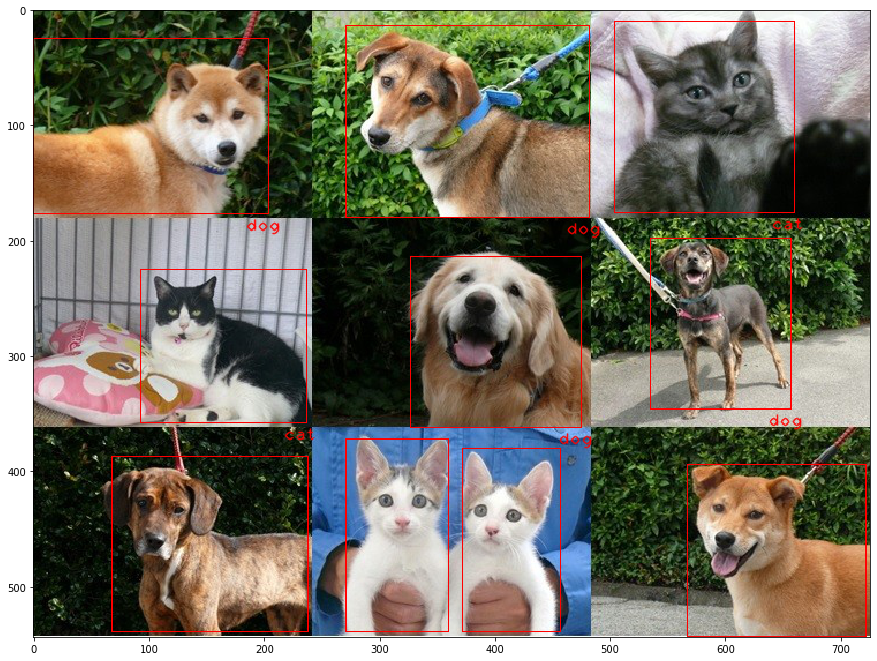

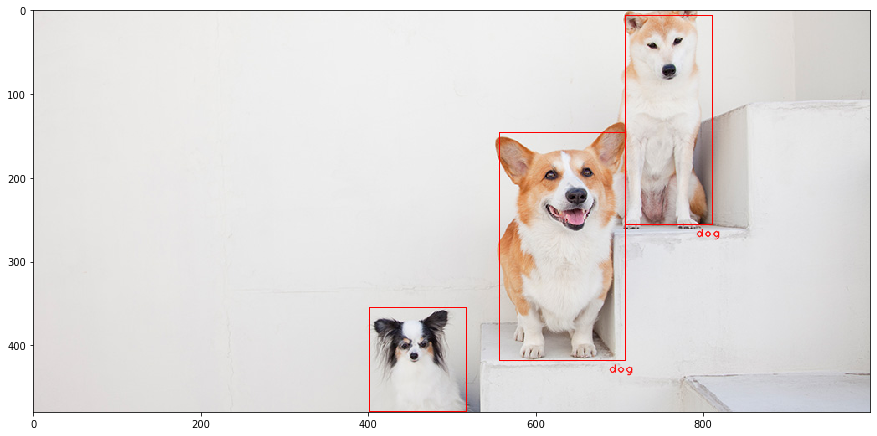

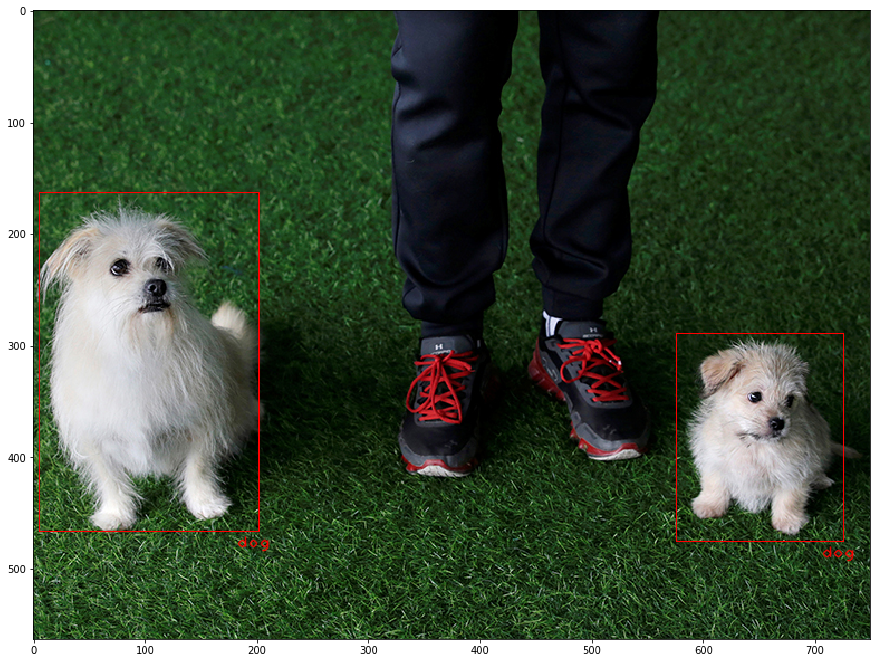

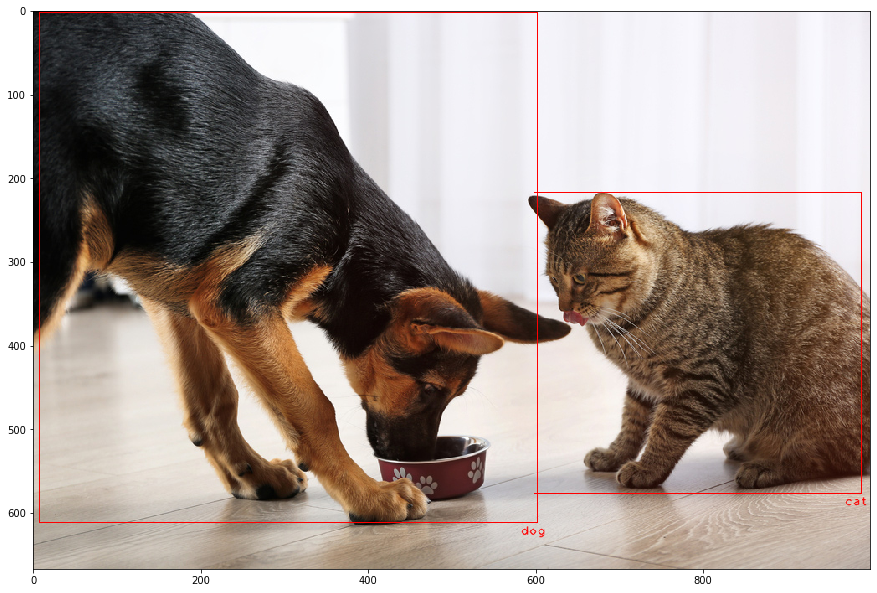

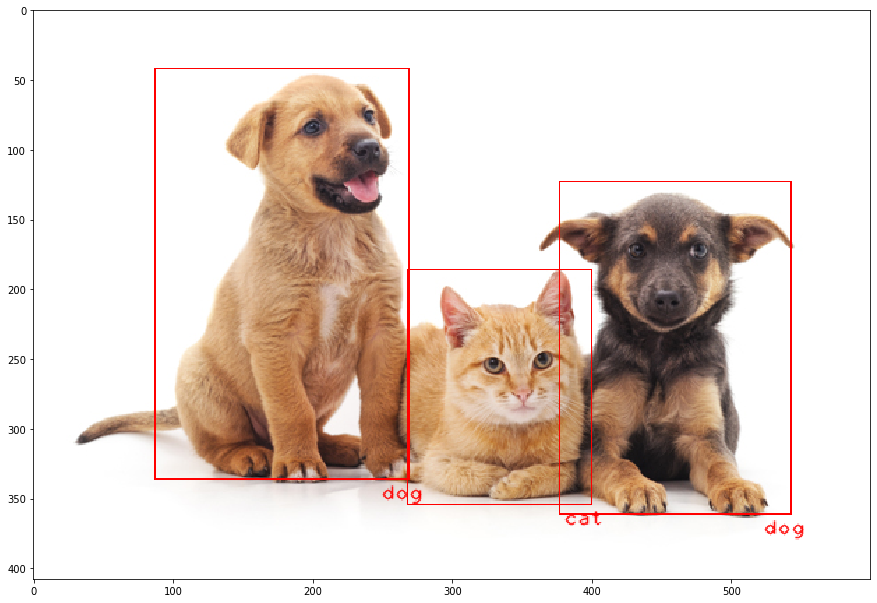

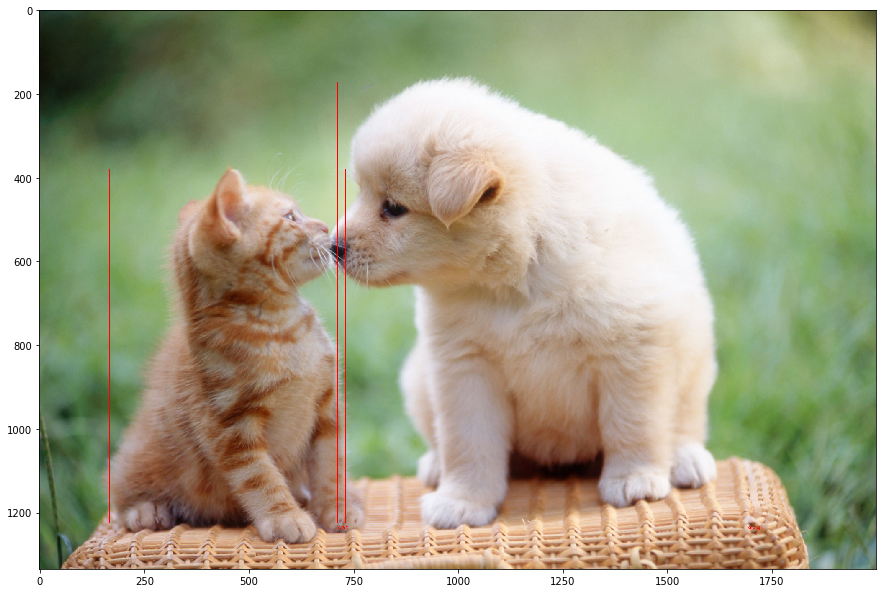

In [118]:
for image in images:
        show_image(image)

In [109]:
#augmentation

In [56]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    #height, width = img.shape[:2]

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    #height, width = img.shape[:2]
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):
    
    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

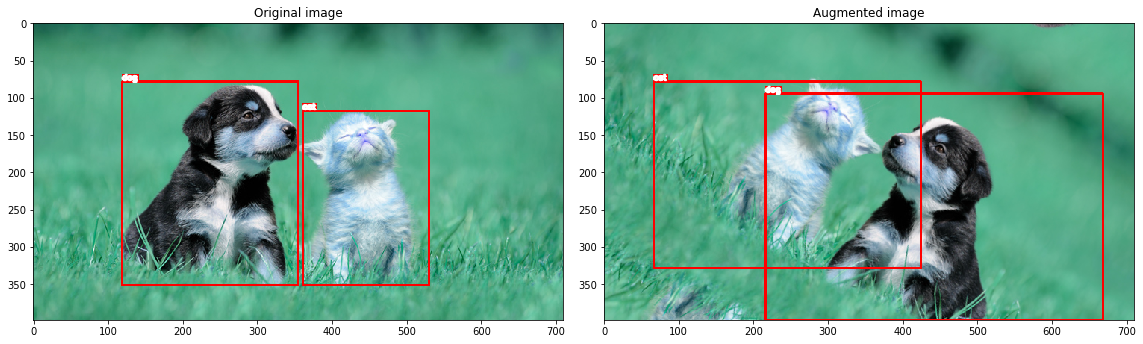

In [66]:
from albumentations import Blur, Rotate, HorizontalFlip
img_path = "../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/img_keep_kv.jpeg"
txt_path = "../sprint18/keras-yolo3-master/03_dog_and_cat_yolo/img_keep_kv.txt"
image = load_image(img_path)
height, width, _ = image.shape

label_num, annotations = load_annotations(txt_path)
min_x = (annotations[:, 0] * width - annotations[:, 2] * width / 2).astype(int)
max_x = (annotations[:, 0] * width + annotations[:, 2] * width / 2).astype(int)
min_y = (annotations[:, 1] * height - annotations[:, 3] * height / 2).astype(int)
max_y = (annotations[:, 1] * height + annotations[:, 3] * height / 2).astype(int)

bboxes = np.array([min_x, min_y, max_x-min_x, max_y-min_y]).T.tolist()
#bboxes = np.array([min_x, min_y, max_x, max_y]).T.tolist()

rotator = Compose(
    [Rotate(p=0.5),  HorizontalFlip(p=0.5)],
    bbox_params={'format':'coco', 'label_fields':['category_id']}
)
rotated = augment_and_show(aug=rotator, image=image, bboxes=bboxes, categories=[0, 1], category_id_to_name=['dog', 'cat'])


augumentationにおいて、Bounding Boxも画像と一緒に変形させることができた。